# Example of using R Markdown with jupyter notebook: An eye movement analysis of sentence reading 

## Abstract 
Mild reading difficulties are a pervasive symptom of aphasia, a language impairment common post stroke. In this study, we used eye tracking to investigate sentence reading by one person diagnosed with aphasia (PWA), compared to a neurologically healthy participant (NHI). Data were extracted from a larger project on sentence reading (published in Aphasiology online). The main aim of this study was to find out whether the eye movements of these two readers are influenced by linguistic factors of word frequency and contextual predictability. The two participants read sentences including target words that varied in word frequency and contextual predictability, and answered comprehension questions. We recorded gaze duration, total fixation duration, and first-pass regressions. Results demonstrated that the PWA had prolonged gaze and total fixation duratations and an increase of first-pass regressions compared to the NHI. Both readers were influenced by word frequency and predictability, but in different ways. Readers varied in gaze duration and first-pass regressions in particular, which may point to differences in the phase of lexical access.



## Load libraries

In [177]:
library(gdata) # used
library(psych)
library(compute.es)
library(ggplot2) # used
library(multcomp)
library(pastecs) # used
library(ez)
library(Hmisc)
library(reshape) # used
library(gridExtra) #used
library(lme4) #used
library(lmerTest) #used

In [178]:
#set working directory
setwd("~/code/juypternotebooks")

## We are going to load data of the two participants from the reading study.
### Open database:

In [179]:
rawdata=read.xls("EMdataexample.xlsx", 
                 na.strings = c("zero"),
                 colClasses = c(
                   'factor',  # RECORDING_SESSION_LABEL
                   'factor',  # GROUP
                   'factor',  # ID_OVERALL
                   'factor',  # ID
                   'factor',  # TRIAL_INDEX
                   'factor',  # trial_type
                   'factor',  # FREQUENCY
                   'factor',  # PREDICTABILITY
                   'factor',  # SENTENCE
                   'factor',  # ITEM
                   'factor',  # QUESTION
                   'factor',  # CRITICAL_WORD
                   'factor',  # ACCURACY   
                   'character', # SINGLE_FIXATION_DURATION
                   'character', # FIRST_FIXATION_DURATION
                   'character', # GAZE_DURATION
                   'character', # RIGHT_BOUNDED_DURATION
                   'character', # REGRESSION_PATH_DURATION
                   'character', # REREADING_DURATION
                   'character', # TOTAL_DURATION
                   'character',  # FIRST_PASS_REGRESSION
                   'character',  # FIRST_PASS_FIXATION
                   'factor',  # FIRST_PASS_MULTI_FIXATION 
                   'character' #trials.fixated
                 )
)



In [180]:
# rawdata

In [181]:
## Create a new dataframe for analysis

In [182]:
data <-rawdata

## Explore the data

In [183]:
str(data)
summary(data) 
head(data[, 1:10])
tail(data[, 1:10])
dim(data)

'data.frame':	112 obs. of  25 variables:
 $ RECORDING_SESSION_LABEL  : Factor w/ 4 levels "c_11_a","c_11_b",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ GROUP                    : Factor w/ 2 levels "NHI","PWA": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID_OVERALL               : Factor w/ 2 levels "1","21": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID                       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ TRIAL_INDEX              : Factor w/ 28 levels "1","10","11",..: 1 12 22 23 24 25 26 27 28 2 ...
 $ TRIAL_TYPE               : Factor w/ 4 levels "Experimental WP HF P",..: 4 2 3 2 4 2 3 1 2 1 ...
 $ FREQUENCY                : Factor w/ 2 levels "high frequency",..: 2 1 2 1 2 1 2 1 1 1 ...
 $ PREDICTABILITY           : Factor w/ 2 levels "predictable",..: 2 2 1 2 2 2 1 1 2 1 ...
 $ SENTENCE                 : Factor w/ 56 levels "After a long day at work she forgot her keys and had to go back to the casino to get them.",..: 7 55 18 19 47 46 31 12 6 39 ...
 $ ITEM                     : Factor w/ 28 levels "ban

 RECORDING_SESSION_LABEL GROUP    ID_OVERALL ID       TRIAL_INDEX
 c_11_a :28              NHI:56   1 :56      1:112   1      : 4  
 c_11_b :28              PWA:56   21:56              10     : 4  
 pwa_1_a:28                                          11     : 4  
 pwa_1_b:28                                          12     : 4  
                                                     13     : 4  
                                                     14     : 4  
                                                     (Other):88  
                TRIAL_TYPE          FREQUENCY        PREDICTABILITY
 Experimental WP HF P:28   high frequency:56   predictable  :56    
 Experimental WP HF U:28   low frequency :56   unpredictable:56    
 Experimental WP LF P:28                                           
 Experimental WP LF U:28                                           
                                                                   
                                                                

RECORDING_SESSION_LABEL,GROUP,ID_OVERALL,ID,TRIAL_INDEX,TRIAL_TYPE,FREQUENCY,PREDICTABILITY,SENTENCE,ITEM
c_11_a,NHI,1,1,1,Experimental WP LF U,low frequency,unpredictable,After the accident they rushed to the campsite to get the injury cleaned.,campsite
c_11_a,NHI,1,1,2,Experimental WP HF U,high frequency,unpredictable,William needs a custom made suit and goes to the school to get one.,school
c_11_a,NHI,1,1,3,Experimental WP LF P,low frequency,predictable,Captain Scott was an Antarctic explorer who was not afraid of challenges.,explorer
c_11_a,NHI,1,1,4,Experimental WP HF U,high frequency,unpredictable,Carla keeps her jewellery in a bank when she goes on holidays.,bank
c_11_a,NHI,1,1,5,Experimental WP LF U,low frequency,unpredictable,The young couple are saving to buy a hostel to refurbish.,hostel
c_11_a,NHI,1,1,6,Experimental WP HF U,high frequency,unpredictable,The poor backpackers are staying in a house in New York.,house


,RECORDING_SESSION_LABEL,GROUP,ID_OVERALL,ID,TRIAL_INDEX,TRIAL_TYPE,FREQUENCY,PREDICTABILITY,SENTENCE,ITEM
107,pwa_1_b,PWA,21,1,23,Experimental WP LF U,low frequency,unpredictable,Before she goes to bed her mum reads her a short email written by her father.,email
108,pwa_1_b,PWA,21,1,24,Experimental WP LF U,low frequency,unpredictable,Ryan loves old castles and is interested in their geology and tales.,geology
109,pwa_1_b,PWA,21,1,25,Experimental WP HF U,high frequency,unpredictable,"Lisa does not like letters, but prefers to write a quick story to tell others about her news.",story
110,pwa_1_b,PWA,21,1,26,Experimental WP HF U,high frequency,unpredictable,At the distillery in Scotland the man bought a bottle of water to take home.,water
111,pwa_1_b,PWA,21,1,27,Experimental WP LF U,low frequency,unpredictable,Anna was able to get a reduced ticket for the show because she is a florist working there.,florist
112,pwa_1_b,PWA,21,1,28,Experimental WP HF P,high frequency,predictable,The young couple are saving to buy a house to refurbish.,house


[1] 112  25

## Preparing variables we are interested in:
### Create variables as numeric


In [184]:
data$TOTAL_DURATION  <-as.numeric(data$TOTAL_DURATION)
data$GAZE_DURATION  <-as.numeric(data$GAZE_DURATION)
data$FIRST_PASS_REGRESSION <-as.numeric(data$FIRST_PASS_REGRESSION)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

### Check whether the data frame inlcudes NAs


In [185]:
which(is.na(data$GAZE_DURATION))
which(is.na(data$TOTAL_DURATION))
which(is.na(data$FIRST_PASS_REGRESSION))
which(is.na(data$FIRST_PAST_FIXATION))

[1]   9  12  13  16  25  26  28  29  46  47  48  52  53  59  65  67  69  74  78
[20]  79  81  82  84  91  92  97 103 104 106 110 111

[1]   9  13  16  26  28  29  46  48  52  53  69 111

[1]   9  12  13  16  25  26  28  29  46  47  48  52  53  59  65  67  69  74  78
[20]  79  81  82  84  91  92  97 103 104 106 110 111

integer(0)

### Exclude the NAs

In [186]:
data <- data[(!is.na(data$GAZE_DURATION)),]
data <- data[(!is.na(data$TOTAL_DURATION)),]
data <- data[(!is.na(data$FIRST_PASS_REGRESSION)),]
data <- data[(!is.na(data$FIRST_PAST_FIXATION)),]

### Check whether it worked ok

In [187]:
which(is.na(data$GAZE_DURATION))
which(is.na(data$TOTAL_DURATION))
which(is.na(data$FIRST_PASS_REGRESSION))
which(is.na(data$FIRST_PAST_FIXATION))

integer(0)

integer(0)

integer(0)

integer(0)

### Rename GROUP as CASE - because this example dataset is restricted to the comparison of two cases


In [188]:
data <- rename(data, c(GROUP="CASE"))


In [189]:
# data

## Data analysis

There are four conditions (=TRIAL TYPES) in this dataset. Sentences with:
*    High frequency predictable words
*    High frequency unpredictable words
*    Low frequency predictable words
*    Low frequency unpredictable words

**Independent variables** are: word frequency, contextual predictability and case

**Dependent variables** are: gaze duration, total fixation duration, first-pass regression

### We start by getting some descriptive stats, comparing the four trial types: 

### Gaze duration as a measure of TRIAL TYPE and CASE



In [190]:
# by(data$GAZE_DURATION, list(data$TRIAL_TYPE, data$CASE), stat.desc, basic= FALSE)

### Total fixation duration as a measure of TRIAL TYPE and CASE



In [191]:
# by(data$TOTAL_DURATION, list(data$TRIAL_TYPE, data$CASE), stat.desc, basic= FALSE)

### First-pass regression as a measure of TRIAL TYPE and CASE


In [192]:
# by(data$FIRST_PASS_REGRESSION, list(data$TRIAL_TYPE, data$CASE), stat.desc, basic= FALSE)

## Plotting - Eye movements independent of trial types
### Gaze duration

In [193]:
plot_gaze <- ggplot(data,aes(x=CASE, y=GAZE_DURATION, fill=CASE)) +  
  stat_summary(fun.data=mean_cl_normal,position=position_dodge(0.95),geom="errorbar") +
  stat_summary(fun.y=mean,position=position_dodge(width=0.95),geom="bar") +
    ylab("Gaze duration in ms") +
    xlab("Case") +
    theme(axis.text=element_text(size=13)) +
    theme(axis.title.x=element_text(size=13)) +
    theme(axis.title.y=element_text(size=13)) +
    ggtitle("Gaze duration NHI vs PWA")
#plot_gaze

### Total fixation duration

In [194]:
plot_total <- ggplot(data,aes(x=CASE, y=TOTAL_DURATION, fill=CASE)) +  
  stat_summary(fun.data=mean_cl_normal,position=position_dodge(0.95),geom="errorbar") +
  stat_summary(fun.y=mean,position=position_dodge(width=0.95),geom="bar") +
    ylab("Total duration in ms") +
    xlab("Case") +
    theme(axis.text=element_text(size=13)) +
    theme(axis.title.x=element_text(size=13)) +
    theme(axis.title.y=element_text(size=13)) +
    ggtitle("Total duration NHI vs PWA")
#plot_total

### First-pass regression


In [195]:
plot_regress_prob <- ggplot(data,aes(x=CASE, y=FIRST_PASS_REGRESSION, fill=CASE)) +  
  stat_summary(fun.data=mean_cl_normal,position=position_dodge(0.95),geom="errorbar") +
  stat_summary(fun.y=mean,position=position_dodge(width=0.95),geom="bar") +
    ylab("Probability of first-pass regression") +
    xlab("Case") +
    theme(axis.text=element_text(size=13)) +
    theme(axis.title.x=element_text(size=13)) +
    theme(axis.title.y=element_text(size=13)) +
    ggtitle("Probability of first-pass regression NHI vs PWA")
#plot_regress_prob

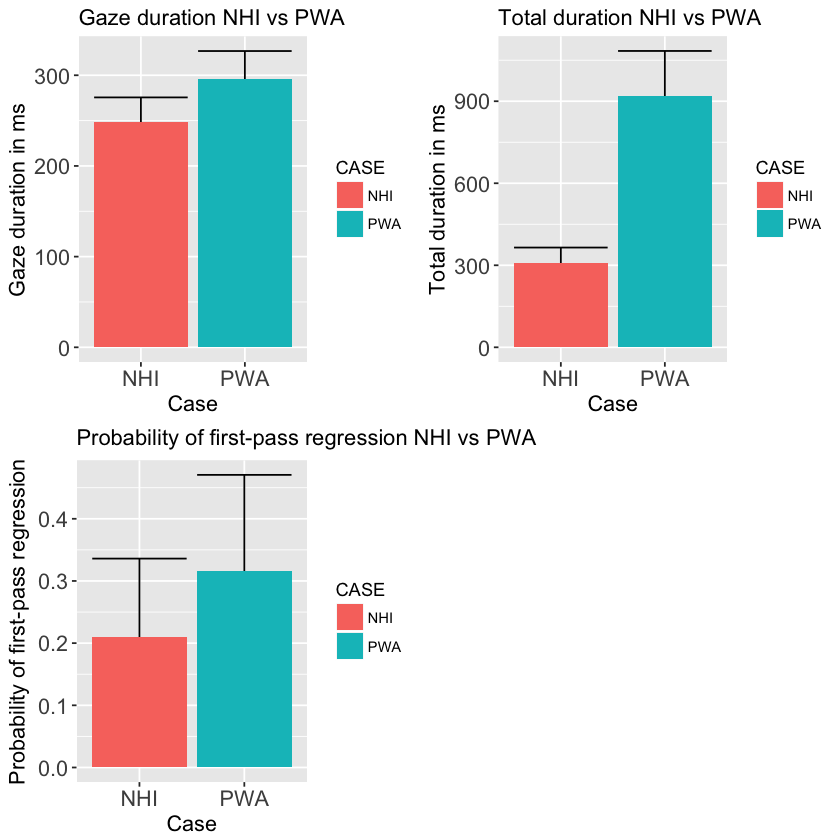

In [196]:
grid.arrange(plot_gaze, plot_total, plot_regress_prob, ncol=2, respect=TRUE)

### Summary: 
The participant with aphasia shows an increase in reading times and in first-pass regressions. 



## Plotting - Eye movements as a function of trial type
### Gaze duration

In [197]:
line_gaze <-
ggplot(data, aes(x=PREDICTABILITY, y=GAZE_DURATION, group=interaction(CASE, FREQUENCY), colour=CASE, linetype=FREQUENCY)) +
  stat_summary(fun.data=mean_cl_normal, geom="errorbar", position=position_dodge(width=0.10), width=0.5)+
  stat_summary(fun.y=mean, geom="line", position=position_dodge(width=0.10)) +
  stat_summary(fun.y=mean, geom="point",position=position_dodge(width=0.10), aes(shape=CASE), size=5) +
  scale_shape_manual(values = c(16, 18)) +
  scale_x_discrete(limits=c("predictable", "unpredictable")) + 
  theme (axis.text.x=element_text(colour="#000000", size=13)) + 
  theme (axis.text.y=element_text(colour="#000000", size=13)) +
  theme(axis.title.y=element_text(colour="#000000", size=13)) +
  theme (axis.title.x = element_blank()) +
  scale_y_continuous(name="Gaze duration in ms") +
  theme(legend.title = element_text(size=13)) +
  theme(legend.text = element_text(size = 13)) +
  theme(legend.position="right")
#line_gaze


### Total fixation duration


In [198]:
line_total <-
ggplot(data, aes(x=PREDICTABILITY, y=TOTAL_DURATION, group=interaction(CASE, FREQUENCY), colour=CASE, linetype=FREQUENCY)) +
  stat_summary(fun.data=mean_cl_normal, geom="errorbar", position=position_dodge(width=0.10), width=0.5)+
  stat_summary(fun.y=mean, geom="line", position=position_dodge(width=0.10)) +
  stat_summary(fun.y=mean, geom="point",position=position_dodge(width=0.10), aes(shape=CASE), size=5) +
  scale_shape_manual(values = c(16, 18)) +
  scale_x_discrete(limits=c("predictable", "unpredictable")) + 
  theme (axis.text.x=element_text(colour="#000000", size=13)) + 
  theme (axis.text.y=element_text(colour="#000000", size=13)) +
  theme(axis.title.y=element_text(colour="#000000", size=13)) +
  theme (axis.title.x = element_blank()) +
  scale_y_continuous(name="Total duration in ms") +
  theme(legend.title = element_text(size=13)) +
  theme(legend.text = element_text(size = 13)) +
  theme(legend.position="right")
#line_total

### First-pass regression

In [199]:
line_regression <-
ggplot(data, aes(x=PREDICTABILITY, y=FIRST_PASS_REGRESSION, group=interaction(CASE, FREQUENCY), colour=CASE, linetype=FREQUENCY)) +
  stat_summary(fun.data=mean_cl_normal, geom="errorbar", position=position_dodge(width=0.10), width=0.5)+
  stat_summary(fun.y=mean, geom="line", position=position_dodge(width=0.10)) +
  stat_summary(fun.y=mean, geom="point",position=position_dodge(width=0.10), aes(shape=CASE), size=5) +
  scale_shape_manual(values = c(16, 18)) +
  scale_x_discrete(limits=c("predictable", "unpredictable")) + 
  theme (axis.text.x=element_text(colour="#000000", size=13)) + 
  theme (axis.text.y=element_text(colour="#000000", size=13)) +
  theme(axis.title.y=element_text(colour="#000000", size=13)) +
  theme (axis.title.x = element_blank()) +
  scale_y_continuous(name="Probability of a first-pass regression") +
  theme(legend.title = element_text(size=13)) +
  theme(legend.text = element_text(size = 13)) +
  theme(legend.position="right")
#line_regression

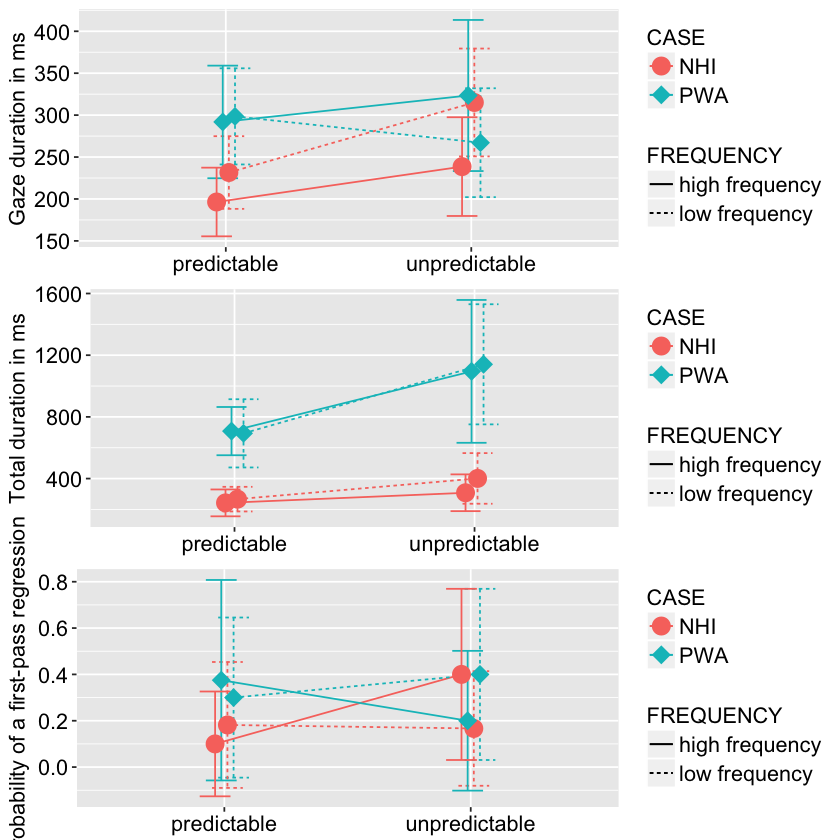

In [200]:
grid.arrange(line_gaze, line_total, line_regression, nrow=3)


### Linear mixed model analysis of effects of word frequency and predictability


### Gaze duration

In [201]:
model_simple = lmer (GAZE_DURATION ~ CASE + (1 | ITEM), 
                       data=data, REML=FALSE)
summary(model_simple)


Linear mixed model fit by maximum likelihood t-tests use Satterthwaite
  approximations to degrees of freedom [lmerMod]
Formula: GAZE_DURATION ~ CASE + (1 | ITEM)
   Data: data

     AIC      BIC   logLik deviance df.resid 
   967.9    977.5   -480.0    959.9       77 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8862 -0.6746 -0.1674  0.4092  3.2879 

Random effects:
 Groups   Name        Variance Std.Dev.
 ITEM     (Intercept)  142.2   11.92   
 Residual             8069.8   89.83   
Number of obs: 81, groups:  ITEM, 28

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   248.25      13.91  65.88  17.850   <2e-16 ***
CASEPWA        46.69      20.05  67.99   2.329   0.0229 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
CASEPWA -0.676

In [202]:
model_a = lmer (GAZE_DURATION ~CASE+FREQUENCY + (1 | ITEM), 
                       data=data, REML=FALSE)

In [203]:
anova(model_simple, model_a)
# not significant so FREQUENCY does not improve model fit

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,4,967.9236,977.5014,-479.9618,959.9236,NA,NA,NA
..1,5,969.1437,981.1159,-479.5718,959.1437,0.7799613,1,0.377153


In [204]:
model_b = lmer (GAZE_DURATION ~CASE+PREDICTABILITY + (1 | ITEM), 
                       data=data, REML=FALSE)

In [205]:
anova(model_simple, model_b)
# not significant so PREDICTABILITY does not improve model fit

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,4,967.9236,977.5014,-479.9618,959.9236,NA,NA,NA
..1,5,966.7371,978.7093,-478.3685,956.7371,3.18653,1,0.07424748


In [206]:
# Checking for interaction between CASE and PREDICTABILITY
model_c = lmer (GAZE_DURATION~CASE + PREDICTABILITY + (1 | ITEM), 
                     data=data, REML=FALSE)
model_d = lmer (GAZE_DURATION~CASE * PREDICTABILITY + (1 | ITEM), 
                     data=data, REML=FALSE)
anova(model_c, model_d) # not significant so no interaction between CASE and PREDICTABIITY 

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,5,966.7371,978.7093,-478.3685,956.7371,NA,NA,NA
..1,6,965.8396,980.2063,-476.9198,953.8396,2.897467,1,0.08871884


In [207]:
# Checking for interaction between CASE and FREQUENCY
model_e = lmer (GAZE_DURATION~CASE + FREQUENCY + (1 | ITEM), 
                     data=data, REML=FALSE)
model_f = lmer (GAZE_DURATION~CASE * FREQUENCY + (1 | ITEM), 
                     data=data, REML=FALSE)
anova(model_e, model_f) # there is a significant interaction between CASE and FREQUENCY 

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,5,969.1437,981.1159,-479.5718,959.1437,NA,NA,NA
..1,6,966.6410,981.0077,-477.3205,954.6410,4.502692,1,0.03384154


### Total duration

In [208]:
model_TD_simple = lmer (TOTAL_DURATION ~CASE + (1 | ITEM), 
                       data=data, REML=FALSE)
summary(model_TD_simple)

Linear mixed model fit by maximum likelihood t-tests use Satterthwaite
  approximations to degrees of freedom [lmerMod]
Formula: TOTAL_DURATION ~ CASE + (1 | ITEM)
   Data: data

     AIC      BIC   logLik deviance df.resid 
  1192.5   1202.1   -592.2   1184.5       77 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9478 -0.4447 -0.1845  0.3674  3.3283 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 ITEM     (Intercept) 2.795e-12 1.672e-06
 Residual             1.313e+05 3.624e+02
Number of obs: 81, groups:  ITEM, 28

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   308.16      55.26  79.88   5.576 3.24e-07 ***
CASEPWA       611.71      80.69  79.88   7.581 5.36e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
CASEPWA -0.685

In [209]:
model_TD_a = lmer (TOTAL_DURATION ~CASE+FREQUENCY + (1 | ITEM), 
                       data=data, REML=FALSE)

In [210]:
anova(model_TD_simple, model_TD_a)
# not significant so FREQUENCY does not improve model fit

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,4,1192.489,1202.067,-592.2445,1184.489,NA,NA,NA
..1,5,1194.352,1206.324,-592.1758,1184.352,0.1373259,1,0.710954


In [211]:
model_TD_b = lmer (TOTAL_DURATION ~CASE+PREDICTABILITY + (1 | ITEM), 
                       data=data, REML=FALSE)

In [212]:
anova(model_TD_simple, model_TD_b)
# significant so PREDICTABILITY does improve model fit

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,4,1192.489,1202.067,-592.2445,1184.489,NA,NA,NA
..1,5,1184.056,1196.028,-587.0281,1174.056,10.43276,1,0.001237993


In [213]:
# Checking for interaction between CASE and PREDICTABILITY
model_TD_c = lmer (TOTAL_DURATION~CASE + PREDICTABILITY + (1 | ITEM), 
                     data=data, REML=FALSE)
model_TD_d = lmer (TOTAL_DURATION~CASE * PREDICTABILITY + (1 | ITEM), 
                     data=data, REML=FALSE)
anova(model_TD_c, model_TD_d) # not significant so no interaction between CASE and PREDICTABIITY 

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,5,1184.056,1196.028,-587.0281,1174.056,NA,NA,NA
..1,6,1181.261,1195.628,-584.6304,1169.261,4.795271,1,0.02853797


In [214]:
# Checking for interaction between CASE and FREQUENCY
model_TD_e = lmer (TOTAL_DURATION~CASE + FREQUENCY + (1 | ITEM), 
                     data=data, REML=FALSE)
model_TD_f = lmer (TOTAL_DURATION~CASE * FREQUENCY + (1 | ITEM), 
                     data=data, REML=FALSE)
anova(model_TD_e, model_TD_f) # no significant interaction between CASE and FREQUENCY 

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,5,1194.352,1206.324,-592.1758,1184.352,NA,NA,NA
..1,6,1196.177,1210.544,-592.0887,1184.177,0.1741596,1,0.6764412


### First-pass regression

In [215]:
model_R_simple = lmer (FIRST_PASS_REGRESSION ~CASE + (1 | ITEM), 
                       data=data, REML=FALSE)
summary(model_R_simple)

Linear mixed model fit by maximum likelihood t-tests use Satterthwaite
  approximations to degrees of freedom [lmerMod]
Formula: FIRST_PASS_REGRESSION ~ CASE + (1 | ITEM)
   Data: data

     AIC      BIC   logLik deviance df.resid 
   103.0    112.6    -47.5     95.0       77 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.7856 -0.6881 -0.4854  1.4974  1.8357 

Random effects:
 Groups   Name        Variance Std.Dev.
 ITEM     (Intercept) 0.003593 0.05994 
 Residual             0.185625 0.43084 
Number of obs: 81, groups:  ITEM, 28

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)   
(Intercept)   0.2100     0.0668 63.6500   3.144  0.00253 **
CASEPWA       0.1053     0.0962 66.0200   1.095  0.27759   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
CASEPWA -0.675

In [216]:
model_R_a = lmer (FIRST_PASS_REGRESSION ~CASE+FREQUENCY + (1 | ITEM), 
                       data=data, REML=FALSE)

In [217]:
anova(model_R_simple, model_R_a)
# not significant so FREQUENCY does not improve model fit

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,4,102.9840,112.5618,-47.49200,94.98401,NA,NA,NA
..1,5,104.9812,116.9534,-47.49058,94.98115,0.00285726,1,0.9573707


In [218]:
model_R_b = lmer (FIRST_PASS_REGRESSION ~CASE+PREDICTABILITY + (1 | ITEM), 
                       data=data, REML=FALSE)

In [219]:
anova(model_R_simple, model_R_b)
# not significant so PREDICTABILITY does not improve model fit

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,4,102.9840,112.5618,-47.49200,94.98401,NA,NA,NA
..1,5,104.6987,116.6709,-47.34935,94.69870,0.2853102,1,0.5932416


In [220]:
# Checking for interaction between CASE and PREDICTABILITY
model_R_c = lmer (FIRST_PASS_REGRESSION~CASE + PREDICTABILITY + (1 | ITEM), 
                     data=data, REML=FALSE)
model_R_d = lmer (FIRST_PASS_REGRESSION~CASE * PREDICTABILITY + (1 | ITEM), 
                     data=data, REML=FALSE)
anova(model_R_c, model_R_d) #  not significant so there is no interaction between CASE and PREDICTABIITY 

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,5,104.6987,116.6709,-47.34935,94.69870,NA,NA,NA
..1,6,105.9649,120.3316,-46.98246,93.96492,0.7337814,1,0.3916602


In [221]:
# Checking for interaction between CASE and FREQUENCY
model_R_e = lmer (FIRST_PASS_REGRESSION~CASE + FREQUENCY + (1 | ITEM), 
                     data=data, REML=FALSE)
model_R_f = lmer (FIRST_PASS_REGRESSION~CASE * FREQUENCY + (1 | ITEM), 
                     data=data, REML=FALSE)
anova(model_R_e, model_R_f) # no significant interaction between CASE and FREQUENCY 

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,5,104.9812,116.9534,-47.49058,94.98115,NA,NA,NA
..1,6,106.4134,120.7801,-47.20670,94.41340,0.5677537,1,0.4511529



### Summary: 

Eye movements by both participants are influenced by word frequency and contextual 
predictability, but in inconsistent ways. The neurologically healthy participant 
demonstrates a word frequency effect in the predicted direction for gaze duration 
(increase in gaze duration for low frequency words), and a predictability effect in 
the expected direction for total duration (prolonged total fixation durations on 
unpredictable words). The participant with aphasia showed a word frequency effect for 
gaze duration that was in the non-predicted direction (longer gaze duration for high 
frequency words), but a predictability effect for total fixation duration in the 
expected direction and in parallel to the neurologically healthy participant. Both
participants seemed to be differently affected by word frequency and predictability
with respect to first-pass regressions. The neurologically healthy particiapnts was 
more likely to regress out of high frequency words if they were unpredictable than low
frequency words. The participant with aphasia, however, regressed more out of unpredictable 
low frequency words than unpredictable high frequency words. However, the models did not 
find that this difference between participants was significant. 
